<a href="https://colab.research.google.com/github/AqilulMuttaqin/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

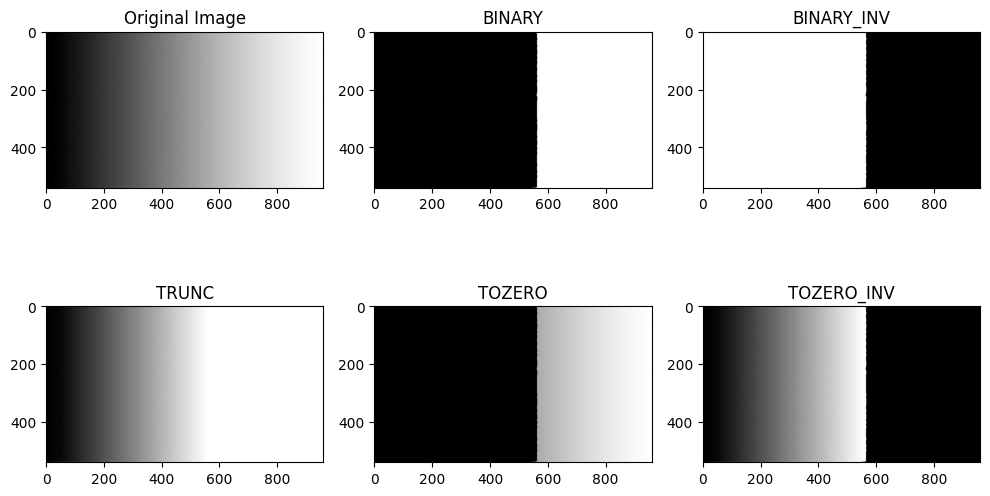

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/gradient.jpg', cv.IMREAD_GRAYSCALE)

# Thresholding menggunakan nilai ambang 170
ret, binary_threshold = cv.threshold(img, 170, 255, cv.THRESH_BINARY)
ret, binary_inv_threshold = cv.threshold(img, 170, 255, cv.THRESH_BINARY_INV)
ret, trunc_threshold = cv.threshold(img, 170, 255, cv.THRESH_TRUNC)
ret, tozero_threshold = cv.threshold(img, 170, 255, cv.THRESH_TOZERO)
ret, tozero_inv_threshold = cv.threshold(img, 170, 255, cv.THRESH_TOZERO_INV)

# Menampilkan gambar asli dan hasil thresholding menggunakan matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(232)
plt.imshow(binary_threshold, cmap='gray')
plt.title('BINARY')

plt.subplot(233)
plt.imshow(binary_inv_threshold, cmap='gray')
plt.title('BINARY_INV')

plt.subplot(234)
plt.imshow(trunc_threshold, cmap='gray')
plt.title('TRUNC')

plt.subplot(235)
plt.imshow(tozero_threshold, cmap='gray')
plt.title('TOZERO')

plt.subplot(236)
plt.imshow(tozero_inv_threshold, cmap='gray')
plt.title('TOZERO_INV')

plt.tight_layout()
plt.show()

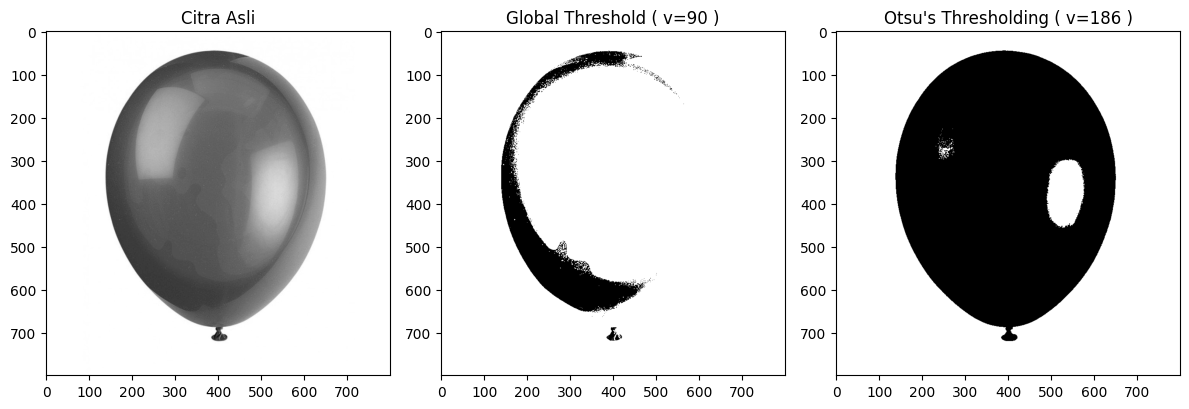

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/balloon.jpg', cv.IMREAD_GRAYSCALE)

# Fungsi untuk menghitung Otsu's Threshold
def otsu_threshold(img):
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.max()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i]) # Probabilitas
        q1, q2 = Q[i], Q[255] - Q[i] # Kumulatif Probabilitas
        if q1 == 0:
            q1 = 1
        if q2 == 0:
            q2 = 1
        m1, m2 = np.hsplit(bins, [i]) # Rata-rata
        m1, m2 = np.sum(p1 * m1) / q1, np.sum(p2 * m2) / q2
        v1, v2 = np.hsplit(bins, [i]) # Variansi
        v1, v2 = np.sum(((p1 * (v1 - m1)) ** 2) / q1), np.sum(((p2 * (v2 - m2)) ** 2) / q2)
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    return thresh

# Thresholding global dengan nilai ambang 90
ret, global_thresholded = cv.threshold(img2, 90, 255, cv.THRESH_BINARY)

# Thresholding Otsu dengan nilai ambang 186
ret, otsu_thresholded = cv.threshold(img2, 186, 255, cv.THRESH_BINARY)

# Menampilkan gambar asli, hasil Otsu's Thresholding, dan hasil Global Thresholding
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(img2, cmap='gray')
plt.title('Citra Asli')

plt.subplot(132)
plt.imshow(global_thresholded, cmap='gray')
plt.title('Global Threshold ( v=90 )')

plt.subplot(133)
plt.imshow(otsu_thresholded, cmap='gray')
plt.title(f"Otsu's Thresholding ( v=186 )")

plt.tight_layout()
plt.show()

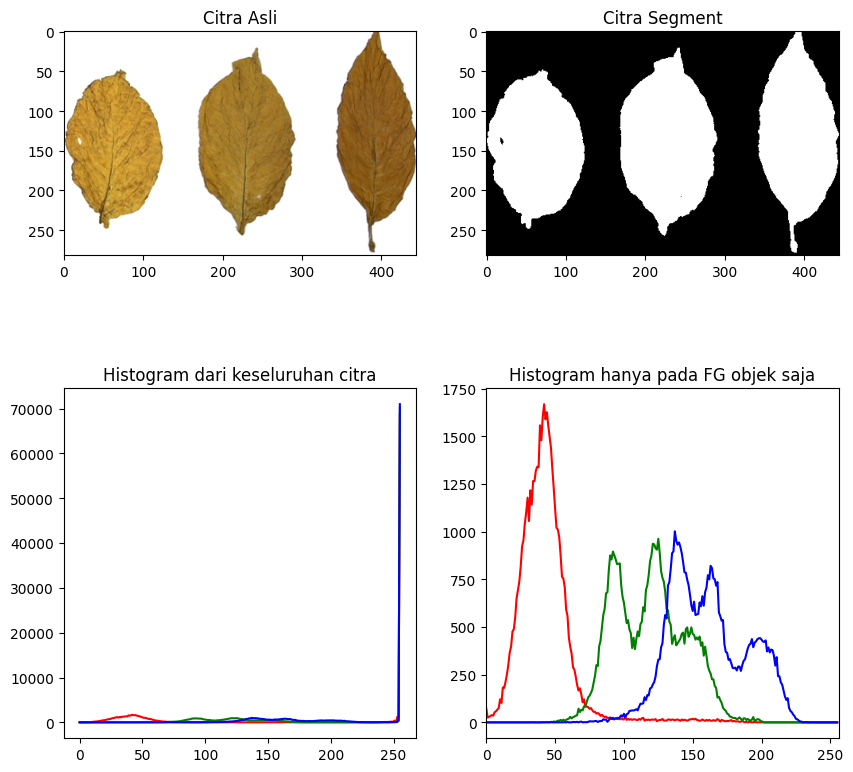

In [ ]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')
img_rgb = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Membuat mask untuk citra segmen (foreground)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))

# Menampilkan citra asli
plt.subplot(2, 2, 1), plt.imshow(img_rgb, cmap='gray')
plt.title('Citra Asli')

# Menampilkan citra segmen
plt.subplot(2, 2, 2), plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')

# Menghitung histogram dari keseluruhan citra
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist0 = cv.calcHist([img3], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3)
    plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')

# Menghitung histogram hanya pada citra segmen (foreground)
for i, col in enumerate(color):
    hist1 = cv.calcHist([img3], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4)
    plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')

plt.xlim([0, 256])

plt.show()

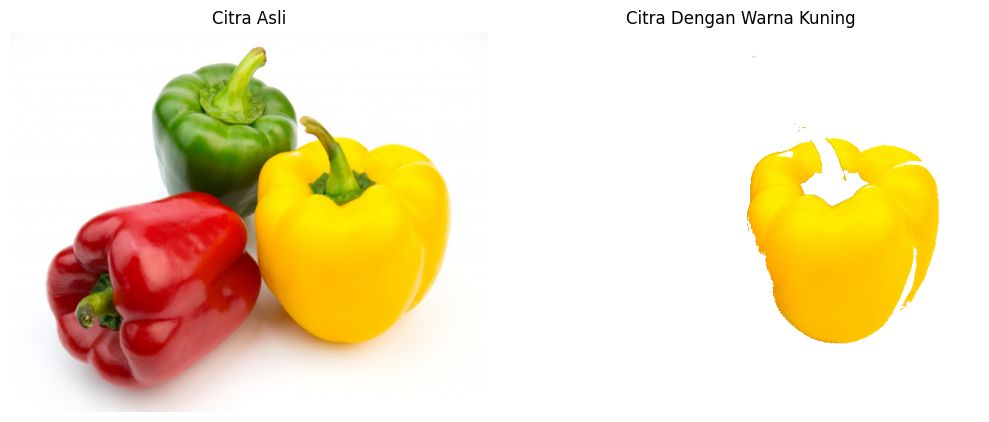

In [ ]:
img4 = []
for i in range(2):
  img4.append(cv.imread('/content/drive/MyDrive/PCVK/peppers.jpg'))

title = ['Citra Asli', 'Citra Dengan Warna Kuning']

lower_yellow = np.array([20, 200, 200], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

hsv_img = cv.cvtColor(img4[0], cv.COLOR_BGR2HSV)

yellow_mask = cv.inRange(hsv_img, lower_yellow, upper_yellow)

img4[1][yellow_mask != 255] = [255, 255, 255]

plt.figure(figsize=(10, 5))
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(cv.cvtColor(img4[i], cv.COLOR_BGR2RGB))
  plt.title(title[i])
  plt.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-8-1907c2557541>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


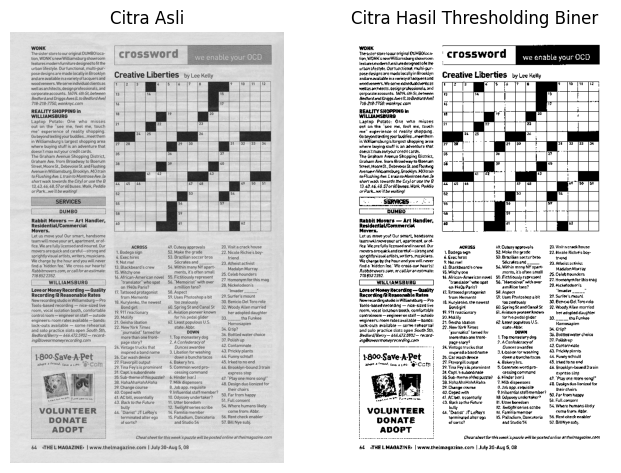

In [ ]:
img5 = []
for i in range(2):
  img5.append(cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg', 0))

_, img5[1] = cv.threshold(img5[1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

title = ['Citra Asli', 'Citra Hasil Thresholding Biner']
fig, axes = plt.subplots(figsize=(12, 8))
for i in range(2):
  plt.subplot(1, 3, i+1)
  plt.imshow(img5[i], cmap='gray')
  plt.title(title[i])
  plt.axis('off')